In [37]:
%matplotlib inline
import numpy as np
from rnn.arch_custommazegrayz32 import RNN
from vae.arch_custom3dmazegray2z32conv1 import VAE
import matplotlib.pyplot as plt
from gym.utils import seeding
from IPython import display
import time
from tensorflow.keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [38]:
rnn = RNN()

# rnn.set_weights('./rnn/weights_custom2dmaze1000.100.ckpt')
rnn.set_weights('./rnn/rnn_weights/weights_custom3dmaze_gray2z32k3conv1g5h256.100.100.50.ckpt')


Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, None, 34)]        0         
_________________________________________________________________
lstm_6 (LSTM)                [(None, None, 256), (None 297984    
_________________________________________________________________
dense_6 (Dense)              (None, None, 481)         123617    
Total params: 421,601
Trainable params: 421,601
Non-trainable params: 0
_________________________________________________________________


In [39]:
# plot_model(rnn.model, to_file='./rnn/model.png', show_shapes=True)

In [40]:
# plot_model(rnn.forward, to_file='./rnn/modelforward.png', show_shapes=True)

In [41]:
rnn.model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, None, 34)]        0         
_________________________________________________________________
lstm_6 (LSTM)                [(None, None, 256), (None 297984    
_________________________________________________________________
dense_6 (Dense)              (None, None, 481)         123617    
Total params: 421,601
Trainable params: 421,601
Non-trainable params: 0
_________________________________________________________________


In [42]:
rnn.forward.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, None, 34)]   0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_21 (InputLayer)           [(None, 256)]        0                                            
__________________________________________________________________________________________________
lstm_6 (LSTM)                   [(None, None, 256),  297984      input_19[0][0]                   
                                                                 input_20[0][0]            

In [43]:
vae = VAE()
vae.set_weights('./vae/vae_weights/weights_custom3dmaze_gray2_rand5000.10z32k3conv1r100000lr0001.ckpt')

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 80, 240, 1)] 0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 40, 120, 3)   30          observation_input[0][0]          
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 14400)        0           conv_layer_1[0][0]               
__________________________________________________________________________________________________
mu (Dense)                      (None, 32)           460832      flatten_3[0][0]                  
____________________________________________________________________________________________

In [44]:
# #python 04_train_rnn.py --new_model --batch_size 200
# # python 04_train_rnn.py --new_model --batch_size 100

# from rnn.arch import RNN
# import argparse
# import numpy as np
# import os

# ROOT_DIR_NAME = './data/'
# SERIES_DIR_NAME = './data/seriesrandom/'


# def get_filelist(N):
#     filelist = os.listdir(SERIES_DIR_NAME)
#     filelist = [x for x in filelist if (x != '.DS_Store' and x!='.gitignore')]
#     filelist.sort()
#     length_filelist = len(filelist)


#     if length_filelist > N:
#       filelist = filelist[:N]

#     if length_filelist < N:
#       N = length_filelist

#     return filelist, N


# def random_batch(filelist, batch_size):
# 	N_data = len(filelist)
# 	indices = np.random.permutation(N_data)[0:batch_size]

# 	z_list = []
# 	action_list = []
# 	rew_list = []
# 	done_list = []

# 	for i in indices:#indicesはbatch_size
# 		try:
# 			new_data = np.load(SERIES_DIR_NAME + filelist[i], allow_pickle=True)

			

# 			mu = new_data['mu']
# 			log_var = new_data['log_var']
# 			action = new_data['action']
# 			reward = new_data['reward']
# 			done = new_data['done']

# 			reward = np.expand_dims(reward, axis=1)
# 			done = np.expand_dims(done, axis=1)

# 			s = log_var.shape

# 			z = mu + np.exp(log_var/2.0) * np.random.randn(*s)

# 			z_list.append(z)
# 			action_list.append(action)
# 			rew_list.append(reward)
# 			done_list.append(done)

# 		except Exception as e:
# 			print(e)

			

# 	z_list = np.array(z_list)
# 	action_list = np.array(action_list)
# 	rew_list = np.array(rew_list)
# 	done_list = np.array(done_list)

# 	return z_list, action_list, rew_list, done_list

# def m():
	
# 	# new_model = args.new_model
# 	N = 10
# 	steps = 1
# 	batch_size = 3

# 	rnn = RNN() #learning_rate = LEARNING_RATE

# 	# if not new_model:
# 	# 	try:
# 	# 		rnn.set_weights('./rnn/weights.h5')
# 	# 	except:
# 	# 		print("Either set --new_model or ensure ./rnn/weights.h5 exists")
# 	# 		raise


# 	filelist, N = get_filelist(N)


# 	for step in range(steps):
# 		print('STEP ' + str(step))

# 		z, action, rew ,done = random_batch(filelist, batch_size)
# 		print(f'z.shape:{z.shape}')
# 		print(f'action.shape:{action.shape}')
# 		print(f'rew.shape{rew.shape}')

# 		rnn_input = np.concatenate([z[:, :-1, :], action[:, :-1, :], rew[:, :-1, :]], axis = 2)
# 		print(f'rnn_input.shape{rnn_input.shape}')
# 		rnn_output = np.concatenate([z[:, 1:, :], rew[:, 1:, :]], axis = 2) #, done[:, 1:, :]
# 		print(f'rnn_output.shape{rnn_output.shape}')
  
# 	# 	if step == 0:
# 	# 		np.savez_compressed(ROOT_DIR_NAME + 'rnn_files.npz', rnn_input = rnn_input, rnn_output = rnn_output)

# 		rnn.train(rnn_input, rnn_output)

# 	# 	if step % 10 == 0:

# 	# 		rnn.model.save_weights('./rnn/weights.h5')

# 	# rnn.model.save_weights('./rnn/weights.h5')




# # if __name__ == "__main__":
# # 		parser = argparse.ArgumentParser(description=('Train RNN'))
# # 		parser.add_argument('--N',default = 10000, help='number of episodes to use to train')
# # 		parser.add_argument('--new_model', action='store_true', help='start a new model from scratch?')
# # 		parser.add_argument('--steps', default = 4000, help='how many rnn batches to train over')
# # 		parser.add_argument('--batch_size', default = 100, help='how many episodes in a batch?')

# # 		args = parser.parse_args()

# # 		main(args)


In [45]:
# m()

In [46]:
# obs_data = np.load('./data/obs_data_car_racing_' + str(batch_num) + '.npy') 
# action_data = np.load('./data/action_data_car_racing_' + str(batch_num) + '.npy')
# reward_data = np.load('./data/reward_data_car_racing_' + str(batch_num) + '.npy') 
# done_data = np.load('./data/done_data_car_racing_' + str(batch_num) + '.npy')

rnn_files = np.load('./data/rnn_files/rnn_files_custom3dmaze_gray2z32k3conv1g5h256.100.100.50.ckpt.npz') 
rnn_input = rnn_files['rnn_input']
rnn_output = rnn_files['rnn_output']

initial_mu = np.load('./data/initial_z/initial_z_custom3dmaze_gray2.5000.10z32k3conv1r100000lr0001.ckpt.npz')['initial_mu']
initial_log_var = np.load('./data/initial_z/initial_z_custom3dmaze_gray2.5000.10z32k3conv1r100000lr0001.ckpt.npz')['initial_log_var']

In [47]:
rnn_output.shape#ステップ０における100エピソード分のrnn_input

(100, 999, 33)

In [48]:
# rnn_input[19][13][33]

In [49]:
# for i in range(100):
#     for j in range(999):
#         if rnn_input[i][j][33]!=0.0:
#             print(i,j)

In [50]:
rnn_input

array([[[ 0.7243,  3.1134,  1.4051, ..., -1.1169,  3.    ,  0.    ],
        [ 0.0808,  0.8787,  0.0583, ..., -0.0952,  5.    ,  0.    ],
        [ 0.5031,  0.0376,  0.8319, ..., -0.7233,  1.    ,  0.    ],
        ...,
        [-0.2094, -1.3353,  0.0824, ..., -0.1406,  0.    ,  0.    ],
        [-0.6863,  0.8037, -0.9339, ..., -1.0927,  3.    ,  0.    ],
        [ 0.4517, -0.0455,  2.1381, ..., -0.1829,  4.    ,  0.    ]],

       [[-0.3404,  3.1487, -0.1036, ..., -1.0145,  3.    ,  0.    ],
        [-0.1406,  0.136 , -0.8171, ..., -1.8018,  5.    ,  0.    ],
        [-0.4212,  0.4137, -1.5135, ...,  0.2964,  4.    ,  0.    ],
        ...,
        [-1.0565, -0.598 , -0.2466, ...,  0.3644,  1.    ,  0.    ],
        [ 0.6436,  3.245 ,  0.3017, ..., -0.8743,  4.    ,  0.    ],
        [ 1.3937,  3.0961,  2.0344, ...,  1.11  ,  5.    ,  0.    ]],

       [[-1.5687,  3.1856,  1.469 , ...,  0.1933,  2.    ,  0.    ],
        [ 0.7116,  3.0354,  0.1552, ..., -0.1431,  2.    ,  0.    ],
    

In [51]:
rnn_output.shape#

(100, 999, 33)

In [52]:
initial_log_var.shape

(10000, 32)

In [53]:
# series_files = np.load('./data/series/291607.npz') 
# mu_file = series_files['mu']
# log_var_3_file = series_files['log_var']
# action_3_file = series_files['action']
# reward_3_file = series_files['reward']
# done_3_file = series_files['done']

In [54]:
# log_var_3_file[0]

In [55]:
rollout_files = np.load('./data/custom3dmaze_gray2/131593.npz') 
print(rollout_files)
obs_file = rollout_files['obs']
print(obs_file.shape)
action_file = rollout_files['action']
reward_file = rollout_files['reward']
done_file = rollout_files['done']

series_files = np.load('./data/custom3dmaze_series_gray2/131593.npz') 
mu_file = series_files['mu']
log_var_file = series_files['log_var']

action_2_file = series_files['action']
reward_2_file = series_files['reward']
done_2_file = series_files['done']
# print(mu_file.shape)


(1000, 80, 240, 1)


In [56]:
for i in range(1000):
    if done_file[i] == 1:
        print(i)

907


In [57]:
for i in range(1000):
    if reward_file[i]==1.0:
        print(i)

907


In [58]:
reward_2_file[376:378]

array([0, 0])

In [59]:
for i in range(1000):
    if reward_2_file[i]!=0:
        print(i)

907


In [60]:
#initial_log_var(6365, 32)
hot_zs = np.where(np.exp(initial_log_var[0]/2) < 0.5)[0]#sigma=exp(log_var/2)
#指定したエピソードにおける１ステップ目の観測をエンコードしたときの1から外れているsigma
hot_zs

array([ 1, 16])

informative dimensions:


array([ 1,  3,  5,  6, 10, 14, 15, 16, 17, 18, 19, 20, 24, 26, 27, 28, 29,
       30, 31])

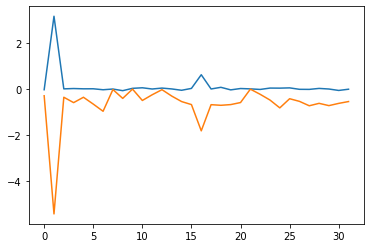

In [61]:
plt.plot(initial_mu[0]);
plt.plot(initial_log_var[0]);
print('informative dimensions:')
hot_zs1 = np.where(abs(initial_log_var[0]) > 0.5)[0]
hot_zs1

In [62]:
GAUSSIAN_MIXTURES = 5
Z_DIM = 32
z_dim = 32

def get_mixture_coef(z_pred):

    log_pi, mu, log_sigma = np.split(z_pred, 3, 1)
    log_pi = log_pi - np.log(np.sum(np.exp(log_pi), axis = 1, keepdims = True))

    return log_pi, mu, log_sigma


In [63]:
def get_pi_idx(x, pdf):
  # samples from a categorial distribution
    N = pdf.size #pi /= pi.sum(axis=1).reshape(z_dim, 1)#(32, 5) N=5
    accumulate = 0
    for i in range(0, N):
        accumulate += pdf[i]
        if (accumulate >= x):
            return i
    random_value = np.random.randint(N)
    #print('error with sampling ensemble, returning random', random_value)
    return random_value

In [64]:
def sample_z(mu, log_sigma):
    z =  mu + (np.exp(log_sigma)) * np_random.randn(*log_sigma.shape) * 0.5
    return z

In [65]:
np_random, seed = seeding.np_random()

In [66]:
seed

14446393517278331274

In [67]:
def sample_next_mdn_output(obs, h, c):
    
    d = GAUSSIAN_MIXTURES * Z_DIM
    # print(np.array([[obs]]))
    # print(np.array([h]))
    # print(np.array([c]))
    
    # print('------')
    # print(np.array([[obs]]).shape)#(1,1,36)
    # print(np.array([h]).shape)#(1,256)
    # print(np.array([c]).shape)#(1,256)
    # print('------')
    # print(obs.shape)
    out = rnn.forward.predict([np.array([[obs]]),np.array([h]),np.array([c])])
    #[[obs]](1,1,36),[h](1,256)
    #forward = Model([rnn_x] + [state_input_h, state_input_c], [mdn_forward, state_h, state_c])
  		#入力[(None,None,36), (None,256),(None,256)]、最後の出力(None,None,481),  lstm_output_forwardからの出力(None,256),(None,256)

    y_pred = out[0][0][0]#(,481)
    new_h = out[1][0]
    new_c = out[2][0]
    
    z_pred = y_pred[:3*d]#(,480)
    rew_pred = y_pred[-1]

    z_pred = np.reshape(z_pred, [-1, GAUSSIAN_MIXTURES * 3])#(32, 15)
    
    log_pi, mu, log_sigma = get_mixture_coef(z_pred)#(32, 5)
    
    chosen_log_pi = np.zeros(z_dim)#(,32)
    chosen_mu = np.zeros(z_dim)
    chosen_log_sigma = np.zeros(z_dim)
    
    # adjust temperatures
    pi = np.copy(log_pi)
#     pi -= pi.max()
    pi = np.exp(pi)
    pi /= pi.sum(axis=1).reshape(z_dim, 1)#(32, 5)
    
#     print(pi)

    for j in range(z_dim):
        
        idx = get_pi_idx(np_random.rand(), pi[j])#書く次元の
        #np_random.rand() 0~1の値
#         print(idx)
        chosen_log_pi[j] = idx
        chosen_mu[j] = mu[j,idx]
        chosen_log_sigma[j] = log_sigma[j,idx]
    # print(f'chosen_log_pi{chosen_log_pi}')
    next_z = sample_z(chosen_mu, chosen_log_sigma)#(,32)

    if rew_pred > 0:
        next_reward = 1
    else:
        next_reward = 0

    return next_z, chosen_mu, chosen_log_sigma, chosen_log_pi, rew_pred, next_reward, new_h, new_c

In [68]:
run_idx = 2#あるエピソードを指定

idx = 0

# real = obs_data[run_idx]
obs = rnn_input[run_idx] #obs.shape (299,36)
actual = rnn_output[run_idx] #actual.shape (299,33)

print(obs.shape)
print(actual.shape)
#z.shape:(3, 300, 32)
#action.shape:(3, 300, 3)
#rew.shape(3, 300, 1)
#rnn_input.shape(3, 299, 36)
#rnn_output.shape(3, 299, 33)


(999, 34)
(999, 33)


In [69]:
obs.shape

(999, 34)

In [70]:
obs

array([[-1.5687,  3.1856,  1.469 , ...,  0.1933,  2.    ,  0.    ],
       [ 0.7116,  3.0354,  0.1552, ..., -0.1431,  2.    ,  0.    ],
       [-0.8906,  3.1966,  1.067 , ...,  0.9126,  3.    ,  0.    ],
       ...,
       [-0.296 ,  0.2159,  0.2331, ...,  3.2201,  5.    ,  0.    ],
       [-1.12  , -0.3795, -0.3118, ...,  3.0944,  5.    ,  0.    ],
       [-0.2918,  0.5761,  1.3841, ...,  3.2516,  3.    ,  0.    ]])

In [71]:
obs[idx,hot_zs]
#あるエピソードにおけるidxステップにおけるsigmaが１に近づいていないインデックスにおけるｚの値
#obs = rnn_input[run_idx] #obs.shape (299,36)
#actual = rnn_output[run_idx] #actual.shape (299,33)


array([3.1856, 0.8525])

4.038101831135916
(2,)


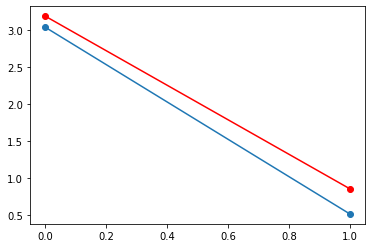

In [72]:
d = GAUSSIAN_MIXTURES * Z_DIM

print(sum(np.abs(obs[idx,hot_zs])))
print(actual[idx,hot_zs].shape)
plt.plot(actual[idx,hot_zs],'o-')
plt.plot(obs[idx,hot_zs],'o-',color='r')
#obs = rnn_input[run_idx] #obs.shape (299,36)
#actual = rnn_output[run_idx] #actual.shape (299,33)


# y_pred = rnn.model.predict(np.array([[obs[idx,:]]]))

# print(y_pred)
# print(y_pred.shape)

# z_pred = y_pred[:,:,:(3*d)] #５×３×３２＝４８０
# print(z_pred.shape)
# rew_pred = y_pred[:,:,-1]



# print(rew_pred)
# print(rew_pred.shape)

# z_pred = np.reshape(z_pred, [-1, GAUSSIAN_MIXTURES * 3])
# print(z_pred)
# print(z_pred.shape)

# log_pi, mu, log_sigma = np.split(z_pred, 3, 1)
# print(mu)
# print(f'mu.shape:{mu.shape}')

# print(mu[hot_zs])
# print(mu[hot_zs].shape)

# # plt.plot(mu[hot_zs])

# log_pi = log_pi - np.log(np.sum(np.exp(log_pi), axis = 1, keepdims = True))

# print(sum(np.abs(mu)))


In [73]:
print(obs[idx,:].shape)
print([obs[idx,:]])
print(np.array([[obs[idx,:]]]).shape)

(34,)
[array([-1.5687,  3.1856,  1.469 ,  0.3542, -0.1439,  1.4742,  0.1342,
       -0.8742,  1.0309, -0.1985,  0.6924, -0.1617,  0.2399, -0.2164,
        0.1959, -0.3622,  0.8525, -0.3471, -1.2916, -0.1191, -0.28  ,
       -2.4274,  0.0415,  0.4023,  0.4714, -1.0772, -0.1609, -0.4995,
        0.1097, -0.7664, -0.9361,  0.1933,  2.    ,  0.    ])]
(1, 1, 34)


In [74]:
y_pred = rnn.model.predict(np.array([[obs[idx,:]]]))
##あるエピソードにおけるidxステップにおけるすべて次元のｚ、action,rewを入力
print(y_pred)
print(y_pred.shape)

[[[ 6.2025 -1.6442  5.4948 -4.9488 -3.7901 -0.0645 -1.9939 -0.0185
    1.6969 -0.0043 -0.02   -0.5524 -0.2015 -0.2422 -0.1883 -9.0469
    4.1062  6.5439 -2.469   4.8508 -1.2664  2.107   3.1621  0.2255
    0.0841 -0.3418 -0.9486 -2.5684 -0.2807 -0.3783 -1.4002  6.7361
    0.1075 -3.3872 -2.5479  0.2398 -0.0126 -0.2393  1.1233 -1.6482
   -0.0765 -0.1371 -0.3301 -0.6391 -0.355   2.9886  0.4581 -5.0435
    4.4649  0.6919 -0.0548 -0.1912  1.3022  0.1173 -1.1696 -0.2218
   -0.3947 -0.5832 -0.249  -0.5902 -3.5837 -2.1031  0.8462  3.4831
    3.4127  1.5599 -1.5004  0.0864  0.0278 -0.0929 -0.6237 -1.337
   -0.3234 -0.1944 -0.1388  6.7107  2.7885 -1.3443 -1.0767 -4.3778
    0.0277 -0.1795 -1.5302  1.0856  0.0482 -0.2737 -0.4415 -0.6978
   -0.3893 -0.3219  3.8821  4.4806 -1.7302 -4.1024 -5.5379 -0.0223
   -0.03    1.2114 -1.1373 -0.6199 -0.4878 -0.4143 -1.0306 -0.855
   -0.5409  0.632  -0.0997 -0.2403  0.0369  0.1564 -0.21   -0.0126
    0.0621  0.0869  0.1845  0.0609 -0.1279 -0.1432 -0.0985  0.01

In [75]:
z_pred = y_pred[:,:,:(3*d)] #５×３×３２＝４８０ d = GAUSSIAN_MIXTURES * Z_DIM
print(z_pred.shape)
rew_pred = y_pred[:,:,-1]
print(rew_pred)
print(rew_pred.shape)

(1, 1, 480)
[[-6.7279]]
(1, 1)


In [76]:
z_pred = np.reshape(z_pred, [-1, GAUSSIAN_MIXTURES * 3])
print(z_pred)
print(z_pred.shape)

[[ 6.2025 -1.6442  5.4948 -4.9488 -3.7901 -0.0645 -1.9939 -0.0185  1.6969
  -0.0043 -0.02   -0.5524 -0.2015 -0.2422 -0.1883]
 [-9.0469  4.1062  6.5439 -2.469   4.8508 -1.2664  2.107   3.1621  0.2255
   0.0841 -0.3418 -0.9486 -2.5684 -0.2807 -0.3783]
 [-1.4002  6.7361  0.1075 -3.3872 -2.5479  0.2398 -0.0126 -0.2393  1.1233
  -1.6482 -0.0765 -0.1371 -0.3301 -0.6391 -0.355 ]
 [ 2.9886  0.4581 -5.0435  4.4649  0.6919 -0.0548 -0.1912  1.3022  0.1173
  -1.1696 -0.2218 -0.3947 -0.5832 -0.249  -0.5902]
 [-3.5837 -2.1031  0.8462  3.4831  3.4127  1.5599 -1.5004  0.0864  0.0278
  -0.0929 -0.6237 -1.337  -0.3234 -0.1944 -0.1388]
 [ 6.7107  2.7885 -1.3443 -1.0767 -4.3778  0.0277 -0.1795 -1.5302  1.0856
   0.0482 -0.2737 -0.4415 -0.6978 -0.3893 -0.3219]
 [ 3.8821  4.4806 -1.7302 -4.1024 -5.5379 -0.0223 -0.03    1.2114 -1.1373
  -0.6199 -0.4878 -0.4143 -1.0306 -0.855  -0.5409]
 [ 0.632  -0.0997 -0.2403  0.0369  0.1564 -0.21   -0.0126  0.0621  0.0869
   0.1845  0.0609 -0.1279 -0.1432 -0.0985  0.0169]


In [77]:
log_pi, mu, log_sigma = np.split(z_pred, 3, 1)
print(mu)
print(f'mu.shape:{mu.shape}')


[[-0.0645 -1.9939 -0.0185  1.6969 -0.0043]
 [-1.2664  2.107   3.1621  0.2255  0.0841]
 [ 0.2398 -0.0126 -0.2393  1.1233 -1.6482]
 [-0.0548 -0.1912  1.3022  0.1173 -1.1696]
 [ 1.5599 -1.5004  0.0864  0.0278 -0.0929]
 [ 0.0277 -0.1795 -1.5302  1.0856  0.0482]
 [-0.0223 -0.03    1.2114 -1.1373 -0.6199]
 [-0.21   -0.0126  0.0621  0.0869  0.1845]
 [-0.0444 -0.7597 -0.0303 -0.0649 -0.4006]
 [ 0.0986  0.0373  0.1608  0.0272 -0.1688]
 [ 0.0135  0.0089 -1.1545  1.5308  0.3811]
 [ 0.0313  1.4729 -0.0725  0.0766 -2.2239]
 [ 0.2168 -0.3456 -0.0814  0.5718 -1.0567]
 [ 0.0179 -1.2715  1.4323 -0.0007  0.3794]
 [-1.37   -0.0785 -0.1233 -0.0916  0.2851]
 [-1.1557 -1.6641 -0.3826  1.3031  0.1543]
 [ 0.4687  0.6097  0.2012 -1.0924  1.0791]
 [-1.2303  0.0902  1.1959  0.2911  0.05  ]
 [ 0.1333  0.0424 -0.1693 -1.1937  1.1089]
 [-0.0272  0.5783  0.0001  0.1443  0.0213]
 [-0.0046  0.0638 -0.0371 -1.1875  1.6416]
 [-0.1479 -0.0298  0.0281  0.2503 -0.1122]
 [-0.047   0.0977 -2.0856  1.3199 -0.029 ]
 [-0.0793 -

[[-1.2664  2.107   3.1621  0.2255  0.0841]
 [ 0.4687  0.6097  0.2012 -1.0924  1.0791]]
(2, 5)


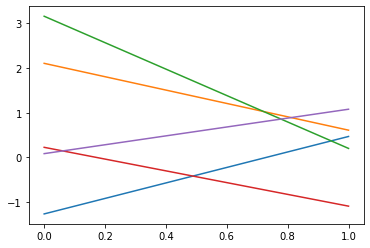

In [78]:
print(mu[hot_zs])
print(mu[hot_zs].shape)
#mu.shape:(32, 5)
#vaeを学習したときのmuが０に近づいていない次元の
plt.plot(mu[hot_zs])

In [79]:
print(np.log(np.sum(np.exp(log_pi), axis = 1, keepdims = True)))
print(np.log(np.sum(np.exp(log_pi), axis = 1, keepdims = True)).shape)

[[6.6034]
 [6.784 ]
 [6.7379]
 [4.7037]
 [4.1804]
 [6.7311]
 [4.9201]
 [1.7544]
 [7.3227]
 [1.6309]
 [3.842 ]
 [4.2279]
 [3.1056]
 [8.6245]
 [5.7023]
 [4.5116]
 [2.7128]
 [5.3351]
 [6.0345]
 [4.8185]
 [5.0998]
 [1.4309]
 [3.0572]
 [5.3824]
 [5.2413]
 [3.7771]
 [5.4995]
 [5.5762]
 [4.3639]
 [2.3057]
 [6.0777]
 [5.0152]]
(32, 1)


In [80]:

log_pi = log_pi - np.log(np.sum(np.exp(log_pi), axis = 1, keepdims = True))
print(log_pi.shape)
print(log_pi)
print(sum(np.abs(mu)))


(32, 5)
[[ -0.401   -8.2476  -1.1086 -11.5522 -10.3935]
 [-15.8309  -2.6778  -0.2402  -9.253   -1.9332]
 [ -8.1381  -0.0017  -6.6304 -10.1251  -9.2858]
 [ -1.7152  -4.2456  -9.7472  -0.2388  -4.0119]
 [ -7.764   -6.2834  -3.3341  -0.6973  -0.7676]
 [ -0.0203  -3.9426  -8.0754  -7.8078 -11.1088]
 [ -1.038   -0.4394  -6.6503  -9.0224 -10.4579]
 [ -1.1223  -1.8541  -1.9947  -1.7175  -1.5979]
 [ -9.112  -11.592   -6.6508  -0.0018  -7.9952]
 [ -1.4457  -1.818   -1.6637  -1.5847  -1.5721]
 [ -0.1592  -2.122   -5.5718  -5.9676  -3.8613]
 [ -0.5865  -6.3206  -1.3291  -1.732   -8.1367]
 [ -0.9023  -2.1257  -0.76    -5.2421  -6.1782]
 [ -0.0192  -9.1774  -9.7122  -3.9709 -16.5076]
 [ -8.3578  -1.0871  -6.2379  -0.4147  -9.6091]
 [ -5.706   -9.4373  -0.0389  -5.8     -3.4509]
 [ -0.2606  -1.7512  -4.0919  -4.1206  -3.776 ]
 [-11.0183  -0.0151  -6.5834  -5.6836  -4.5826]
 [ -7.8545  -0.0017 -10.6955  -7.2135  -7.566 ]
 [ -4.2339  -6.3623  -5.8843  -6.0259  -0.0217]
 [ -0.0641  -3.0397  -4.4029  -7

In [81]:
current_z = obs[idx]#初めのステップにおけるｚ３２，act3,rew1の３６
i = idx
current_h = np.zeros(256)
current_c = np.zeros(256)

In [82]:
next_z = obs[idx,:]#(36,)あるエピソードのidxステップにおけるｚ３２，act3,rew1の３６
next_h = np.zeros(256)
next_c = np.zeros(256)
# next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]
# plt.imshow( next_z_decoded)
# plt.show()

In [83]:
run_idx = 0#あるエピソードを指定

idx = 0

# real = obs_data[run_idx]
obs1 = rnn_input[run_idx] #obs.shape (299,36)
print(obs1.shape)
actual1 = rnn_output[run_idx] #actual.shape (299,33)
print(actual.shape)

(999, 34)
(999, 33)


In [84]:
import time


In [85]:
next_z = obs1[0,:]#(36,)あるエピソードのidxステップにおけるｚ３２，act3,rew1の３６

In [86]:
#SIMULATE TURNING IN THE DREAM
# plt.figure(figsize=(16, 14))
# from IPython import display
# from IPython.display import HTML
# for i in range(3):
#     next_z, chosen_mu, chosen_log_sigma, chosen_pi, rew_pred, next_reward, next_h, next_c \
#     = sample_next_mdn_output(next_z, next_h, next_c)
#     #next_z(,32) next_reward(,1)
#     next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]#[next_z](1,32)
#     #next_z_decoded(64,64,3)
#     next_z = np.concatenate([next_z, [1,1,0], [next_reward]])#(36,)
    
#     plt.gca().cla() 
#     plt.imshow(next_z_decoded)
    
#     display.display(HTML(f"<h1>dream_reward: {next_reward}</h1>"))
#     # print(next_reward)
#     display.display(HTML(f"<h1>{i}</h1>"))
#     time.sleep(0.3)
#     display.clear_output(wait=True)
#     display.display(plt.gcf()) 
    
#     # display.display(HTML(f"<h1>{i}</h1>"))
    

In [87]:
run_idx = 9#あるエピソードを指定

# idx = 4

# real = obs_data[run_idx]
obs1 = rnn_input[run_idx] #obs.shape (999,34)
actual1 = rnn_output[run_idx] #actual.shape (999,33)
next_z = obs1[0,:]#(34,)あるエピソードのidxステップにおけるｚ３２，act3,rew1の３６
# print(next_z.shape)
#SIMULATE TURNING IN THE DREAM
plt.figure(figsize=(16, 14))
from IPython import display
from IPython.display import HTML
act = [3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
for i in range(0,300):
    next_z, chosen_mu, chosen_log_sigma, chosen_pi, rew_pred, next_reward, next_h, next_c \
    = sample_next_mdn_output(next_z, next_h, next_c)
    #next_z(,32) next_reward(,1)
    next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]#[next_z](1,32)
    #next_z_decoded(64,64,3)
    # next_action = np.random.randint(4)
    if act[i]:
        next_z = np.concatenate([next_z, [act[i]], [next_reward]])#(36,)
        display.display(HTML(f"<h1>action: {act[i]}</h1>"))
        time.sleep(0.1)
    else:
        next_action = np.random.randint(4)
        next_z = np.concatenate([next_z, [next_action], [next_reward]])#(36,)
        display.display(HTML(f"<h1>action: {next_action}</h1>"))
    plt.gca().cla() 
    plt.imshow(next_z_decoded[:,:,0])
    
    display.display(HTML(f"<h1>dream_reward: {next_reward}</h1>"))
    
    # print(next_reward)
    display.display(HTML(f"<h1>step: {i}</h1>"))
    time.sleep(1)
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    
    # display.display(HTML(f"<h1>{i}</h1>"))
# next_z, chosen_mu, chosen_log_sigma, chosen_pi, rew_pred, next_reward, next_h, next_c \
#     = sample_next_mdn_output(next_z, next_h, next_c)

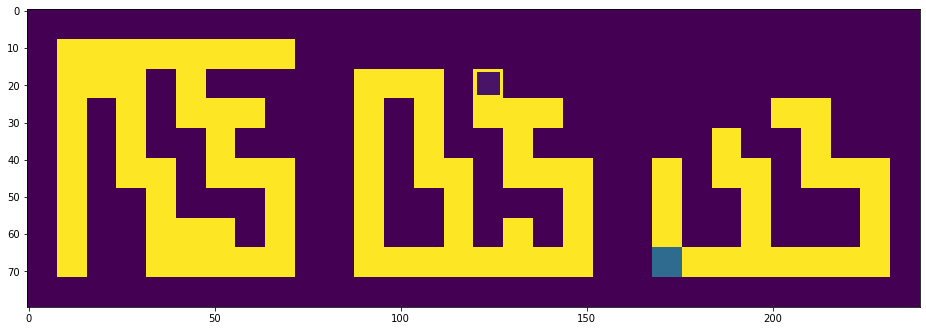

KeyboardInterrupt: 

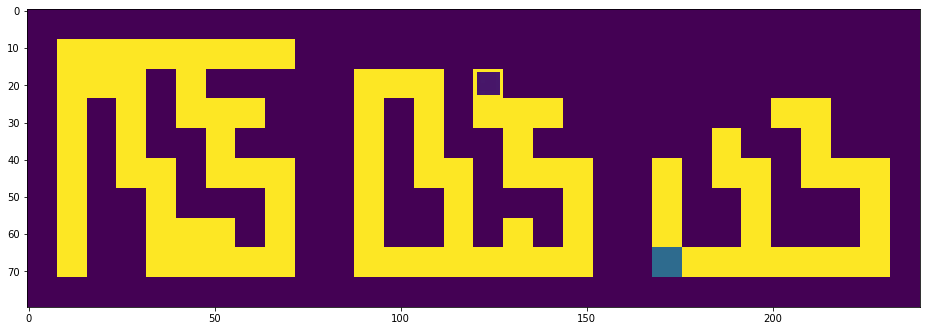

In [89]:
run_idx = 10#あるエピソードを指定

idx = 4

# real = obs_data[run_idx]
obs1 = rnn_input[run_idx] #obs.shape (299,34)
actual1 = rnn_output[run_idx] #actual.shape (299,33)
next_z = obs1[0,:]#(36,)あるエピソードのidxステップにおけるｚ３２，act3,rew1の３６
# print(next_z.shape)
# next_z[:] = [-1.299,-0.1992,0.2418,1.0918,-0.0041,0.66,-0.4346,-0.4753,-0.9287
# ,-1.2936,0.3007,-0.1005,-1.1653,1.6366,0.2607,1.9712,-0.5951,-0.5298
# ,1.7524,0.9697,-2.6882,-0.0094,-0.5418,-0.1861,1.8238,0.5105,-0.0606
# ,1.7236,0.407,-0.3562,-0.2953,-0.7296,0,-0.1]
#SIMULATE TURNING IN THE DREAM
plt.figure(figsize=(16, 14))
from IPython import display
from IPython.display import HTML
# act = [3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
for i in range(0,1000):
    next_z, chosen_mu, chosen_log_sigma, chosen_pi, rew_pred, next_reward, next_h, next_c \
    = sample_next_mdn_output(next_z, next_h, next_c)
    #next_z(,32) next_reward(,1)
    next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]#[next_z](1,32)
    #next_z_decoded(64,64,3)
    # next_action = np.random.randint(4)

    
    next_action = np.random.randint(6)
   
    next_z = np.concatenate([next_z, [next_action], [next_reward]])#(36,)
    if i ==0:
        old_action=next_action
    else: 
        if old_action==0:
            display.display(HTML(f"<h1>action:前 {old_action}</h1>"))
        elif old_action==1:
            display.display(HTML(f"<h1>action:右 {old_action}</h1>"))
        elif old_action==2:
            display.display(HTML(f"<h1>action:後 {old_action}</h1>"))
        elif old_action==3:
            display.display(HTML(f"<h1>action:左 {old_action}</h1>"))
        elif old_action==4:
            display.display(HTML(f"<h1>action:上 {old_action}</h1>"))
        elif old_action==5:
            display.display(HTML(f"<h1>action:下 {old_action}</h1>"))
        plt.gca().cla() 
        plt.imshow(next_z_decoded[:,:,0])
        
        display.display(HTML(f"<h1>dream_reward: {next_reward}</h1>"))
        
        # print(next_reward)
        display.display(HTML(f"<h1>step: {i}</h1>"))
        time.sleep(1)
        display.clear_output(wait=True)
        display.display(plt.gcf()) 
        old_action=next_action

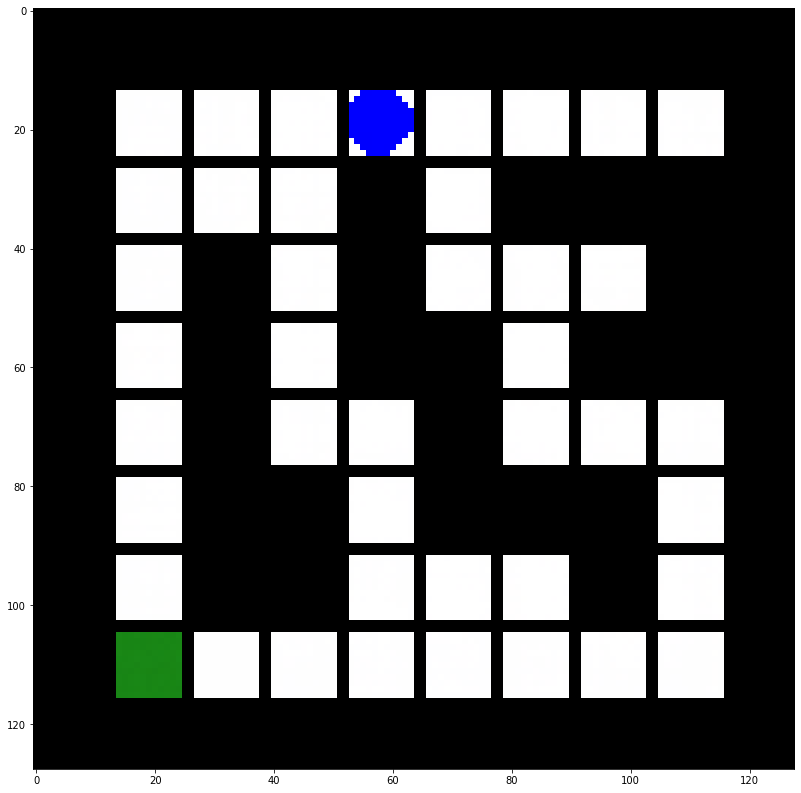

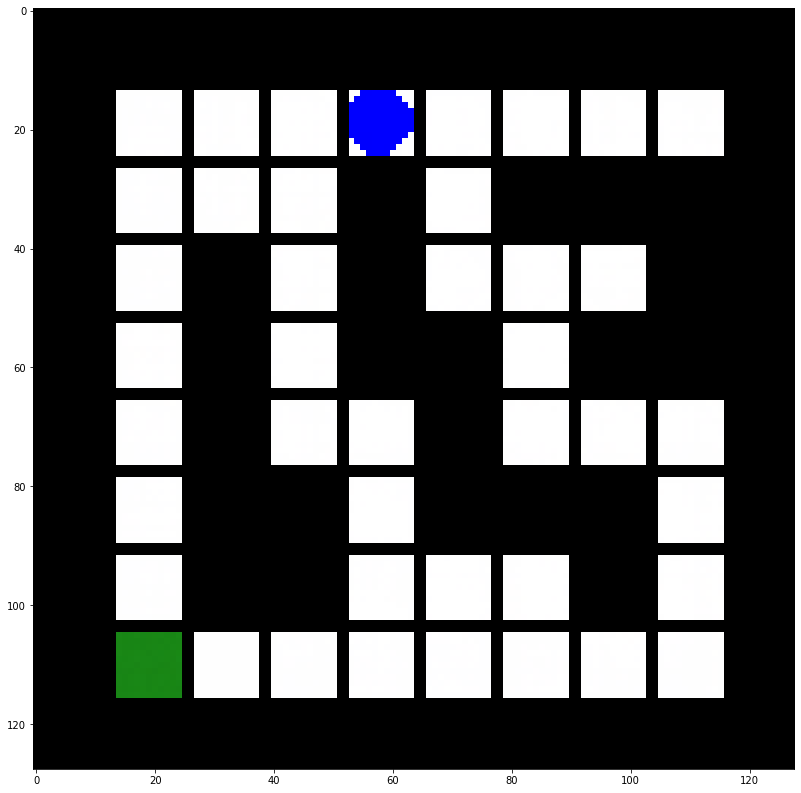

In [ ]:
from PIL import Image
output_directory = './data/dream_images/'

run_idx = 10#あるエピソードを指定
next_actions = []
idx = 4

# real = obs_data[run_idx]
obs1 = rnn_input[run_idx] #obs.shape (299,36)
actual1 = rnn_output[run_idx] #actual.shape (299,33)
next_z = obs1[0,:]#(36,)あるエピソードのidxステップにおけるｚ３２，act3,rew1の３６
# print(next_z.shape)
#SIMULATE TURNING IN THE DREAM
plt.figure(figsize=(16, 14))
from IPython import display
from IPython.display import HTML
# act = [3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
for i in range(0,10):
    next_z, chosen_mu, chosen_log_sigma, chosen_pi, rew_pred, next_reward, next_h, next_c \
    = sample_next_mdn_output(next_z, next_h, next_c)
    #next_z(,32) next_reward(,1)
    next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]#[next_z](1,32)
    #next_z_decoded(64,64,3)
    # next_action = np.random.randint(4)

    decoded_image = Image.fromarray((next_z_decoded * 255).astype('uint8'))
    
    # 画像を保存
    file_name = f'decoded_image_{i}.png'
    decoded_image.save(output_directory + file_name)
    next_action = np.random.randint(4)
    next_actions.append(next_action)
    next_z = np.concatenate([next_z, [next_action], [next_reward]])#(36,)
    display.display(HTML(f"<h1>action: {next_action}</h1>"))
    plt.gca().cla() 
    plt.imshow(next_z_decoded)
    
    display.display(HTML(f"<h1>dream_reward: {next_reward}</h1>"))
    
    # print(next_reward)
    display.display(HTML(f"<h1>step: {i}</h1>"))
    time.sleep(1)
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

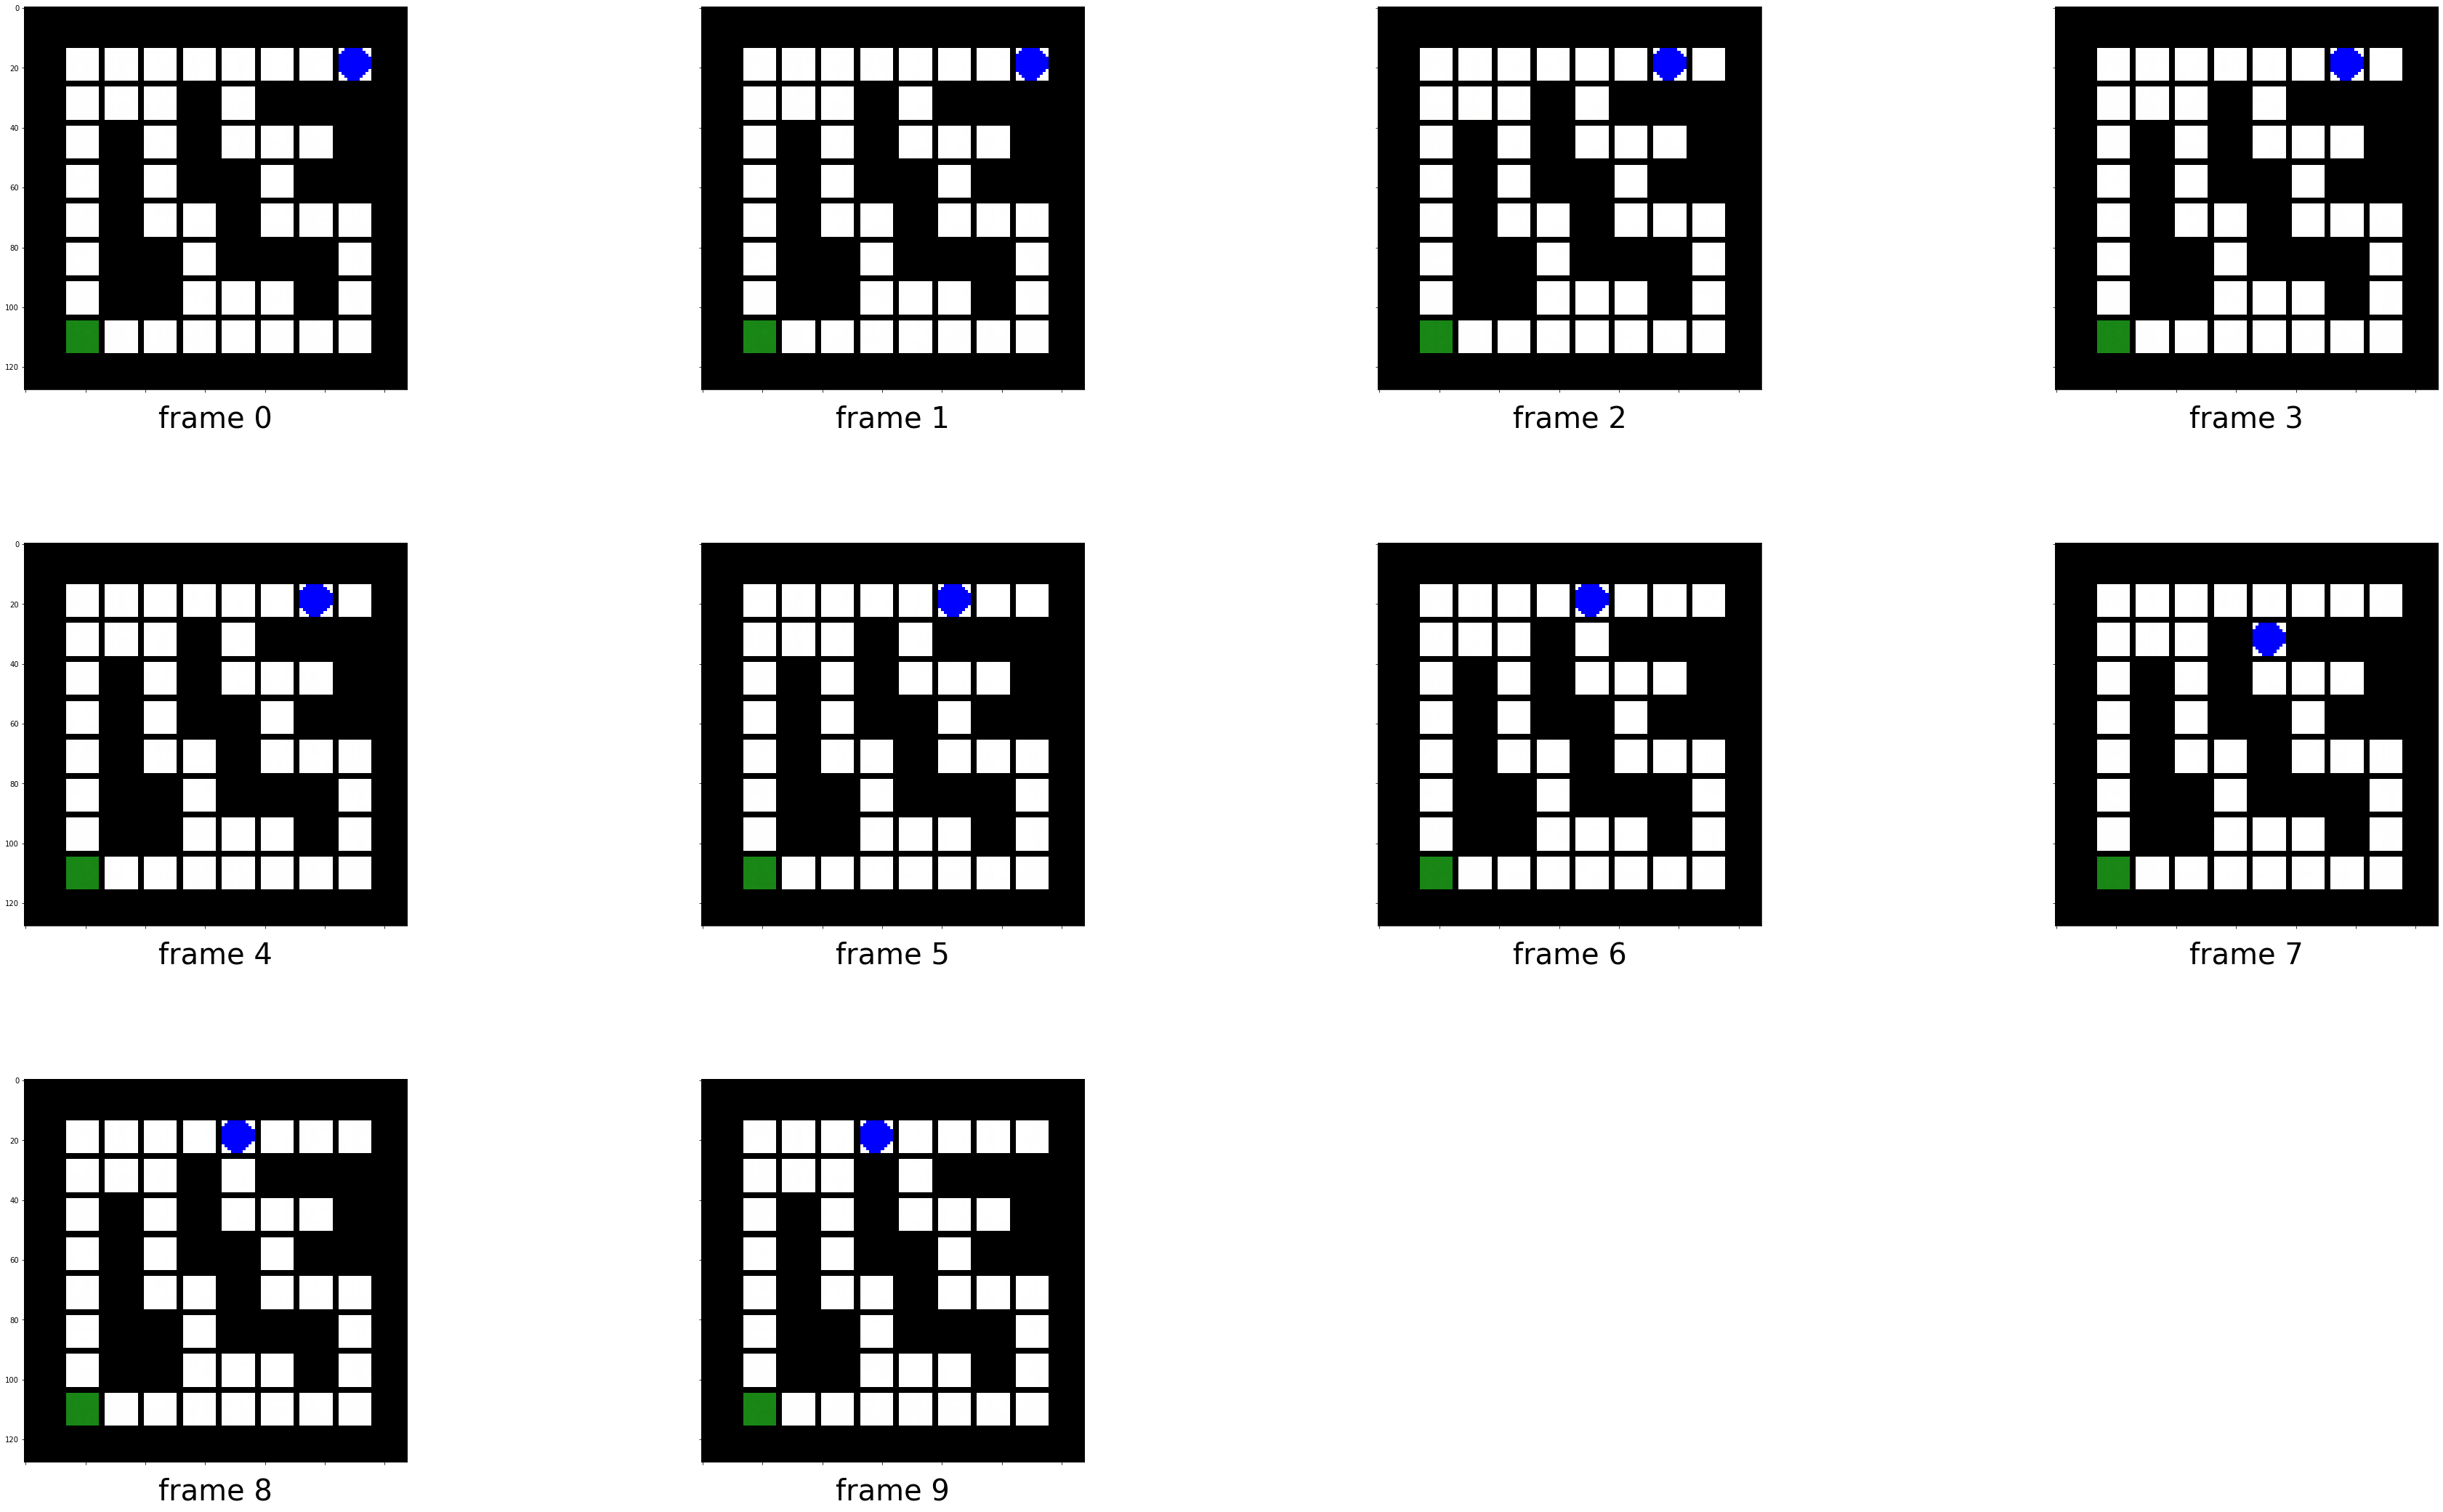

In [ ]:
import matplotlib.pyplot as plt
import os

# 保存した画像が格納されているディレクトリを指定
image_directory = './data/dream_images/'

# ディレクトリ内の画像ファイルを取得
image_files = sorted([os.path.join(image_directory, file) for file in os.listdir(image_directory) if file.endswith('.png')])

# サブプロットの行と列の数を指定
nrows = 5
ncols = 4

# サブプロットのサイズと共有設定を指定
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(64, 64), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.4)

# インデックス
idx = 0

# 画像を表示
for x in range(nrows):
    for y in range(ncols):
        if idx < len(image_files):
            image = plt.imread(image_files[idx])
            axes[x, y].imshow(image)

            axes[x, y].text(0.5, -0.1, 'frame ' + str(idx), size=40, ha="center",
                            transform=axes[x, y].transAxes)

            # 他の情報を追加する場合はここに追加

            idx += 1

# 余分なサブプロットを非表示に
for i in range(idx, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

# 画像を表示
plt.show()


In [ ]:
next_actions

[1, 3, 2, 2, 3, 3, 2, 0, 3, 0]

(33, 999)
(999, 34)
next_z(,32):[-0.1946 -0.9425 -0.4066 -0.1095  0.1237 -0.2532  0.1933  0.3592  0.3224
 -0.2196 -0.4093  0.0551 -0.1349 -0.0923 -0.1291 -0.3992  0.3725 -0.1998
 -0.3216  0.0471  0.6167  0.402  -0.8729  0.0745 -0.7877  0.1302  0.8628
 -0.0837  0.0276  0.1766  0.5726  0.6825]
next_zs[:,i]:[-0.1946 -0.9425 -0.4066 -0.1095  0.1237 -0.2532  0.1933  0.3592  0.3224
 -0.2196 -0.4093  0.0551 -0.1349 -0.0923 -0.1291 -0.3992  0.3725 -0.1998
 -0.3216  0.0471  0.6167  0.402  -0.8729  0.0745 -0.7877  0.1302  0.8628
 -0.0837  0.0276  0.1766  0.5726  0.6825]
next_z(,36):[-0.1946 -0.9425 -0.4066 -0.1095  0.1237 -0.2532  0.1933  0.3592  0.3224
 -0.2196 -0.4093  0.0551 -0.1349 -0.0923 -0.1291 -0.3992  0.3725 -0.1998
 -0.3216  0.0471  0.6167  0.402  -0.8729  0.0745 -0.7877  0.1302  0.8628
 -0.0837  0.0276  0.1766  0.5726  0.6825  1.      0.    ]
next_z(,32):[-0.4136  0.2058  0.5141  0.2528  0.2111 -0.5271  0.2814  0.4953  1.2371
 -0.2487 -0.1287 -0.0149 -0.2799  0.4256  0.2621 -0.4867  0

/home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a

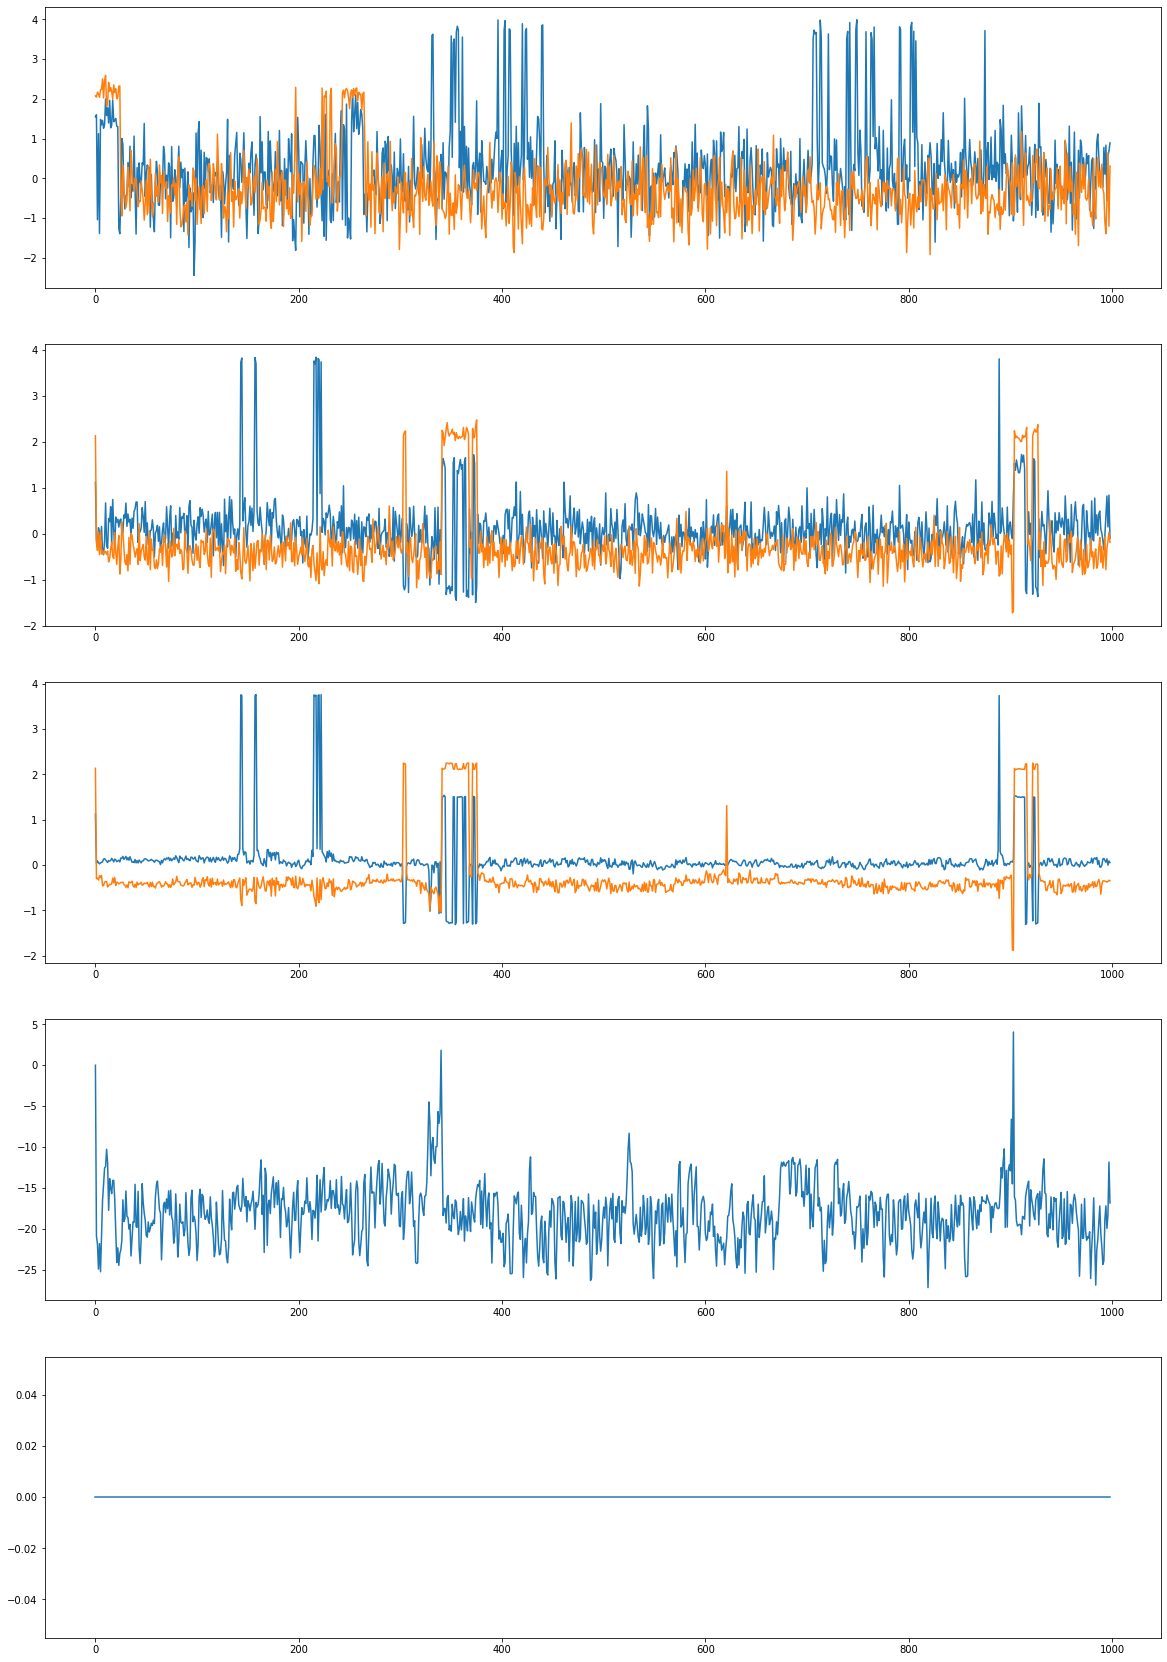

In [ ]:
# obs = rnn_input[run_idx] #obs.shape (999,34)
# actual = rnn_output[run_idx] #actual.shape (999,33)


b = np.swapaxes(actual,0,1)#(33,299)
print(b.shape)
actual_rew = b[-1,:]
print(obs.shape)
next_zs = np.zeros(shape = (32,999))
next_mus = np.zeros(shape = (32,999))
next_rews = np.zeros(shape = (1,999))
# next_z = np.copy(obs)
# print(next_z.shape)
next_z = obs[idx,:]#(33)

next_mus[:,0] = next_z[:32]
next_zs[:,0] = next_z[:32]
next_rews[:,0] = next_z[-1]

for i in range(1,999):
    next_z, chosen_mu, chosen_log_sigma, chosen_pi, rew_pred, next_reward, next_h, next_c = sample_next_mdn_output(next_z, next_h, next_c)
    print(f'next_z(,32):{next_z}')
    next_mus[:,i] = chosen_mu
    next_zs[:,i] = next_z
    #next_zs(32,299)
    print(f'next_zs[:,i]:{next_zs[:,i]}')
    next_rews[:,i] = rew_pred
    
    next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]
    
#     plt.gca().cla() 
#     plt.imshow( next_z_decoded)
# #     plt.show()
#     display.clear_output(wait=True)
#     display.display(plt.gcf()) 
    next_action = np.random.randint(4)
    next_z = np.concatenate([next_z, [next_action], [next_reward]])
    print(f'next_z(,36):{next_z}')
plt.figure(figsize=(20,30))
for i in hot_zs:
    plt.subplot(511)
    plt.plot( b[i,:])
    plt.subplot(512)
    plt.plot( next_zs[i,:])
    plt.subplot(513)
    plt.plot( next_mus[i,:])
    
plt.subplot(514)
plt.plot(next_rews[0,:])

plt.subplot(515)
plt.plot(actual_rew[:])
    
# print(next_zs)
    

In [ ]:
# obs = rnn_input[run_idx] #obs.shape (299,36)
# actual = rnn_output[run_idx] #actual.shape (299,33)


b = np.swapaxes(actual,0,1)#(33,299)
print(b.shape)
actual_rew = b[-1,:]
actual_rew.shape


(33, 999)


(999,)

In [ ]:
next_zs = np.zeros(shape = (32,999))
next_mus = np.zeros(shape = (32,999))
next_rews = np.zeros(shape = (1,999))
next_rewards = np.zeros(shape = (1,999))
# next_z = np.copy(obs)
# print(next_z.shape)
next_z = obs[idx,:]#(33)

next_mus[:,0] = next_z[:32]
next_zs[:,0] = next_z[:32]
next_rews[:,0] = next_z[-1]

In [ ]:
next_mus

array([[ 0.3459,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [-0.1764,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [-0.3726,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [-0.7255,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.5584,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [-0.4399,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [ ]:
next_mus[0,:]#一次元目の０～２９９ステップ分

array([-1.4127,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0. 

In [ ]:
next_mus[:,0]#３２次元分の一ステップ目

array([-1.4127,  0.6114, -0.6141,  1.1237, -0.0323,  0.019 , -0.4399,
       -0.2995, -0.5472, -0.3246, -0.7641,  0.4561,  1.124 ,  0.3752,
       -0.2268,  0.1243,  0.7319,  2.1321,  3.1055,  0.3029,  2.0191,
       -0.4246,  2.6234,  0.8609,  1.0535,  0.1454,  0.2341,  0.2009,
        0.3271,  0.2523, -0.3949,  0.1824])

In [ ]:
for i in range(1,999):
    next_z, chosen_mu, chosen_log_sigma, chosen_pi, rew_pred, next_reward, next_h, next_c = sample_next_mdn_output(next_z, next_h, next_c)
    print(f'next_z(,32):{next_z}')
    next_mus[:,i] = chosen_mu
    next_zs[:,i] = next_z
    print(f'next_zs[:,{i}]:{next_zs[:,i]}')
    next_rews[:,i] = rew_pred#(1,299)
    next_rewards[:,i]=next_reward#(1,299)
    next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]
    
#     plt.gca().cla() 
#     plt.imshow( next_z_decoded)
# #     plt.show()
#     display.clear_output(wait=True)
#     display.display(plt.gcf()) 
    next_action = np.random.randint(4)
    next_z = np.concatenate([next_z, [next_action], [next_reward]])
    print(f'next_z(,36):{next_z}')
plt.figure(figsize=(20,30))

ValueError: in user code:

    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:270 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model_3: expected shape=(None, None, 34), found shape=(None, 1, 32)


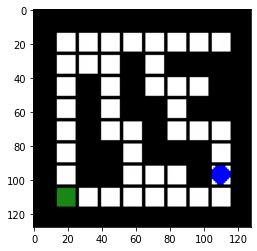

In [ ]:
plt.imshow( next_z_decoded)

(33, 999)


/home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/ipykernel_launche

(999,)

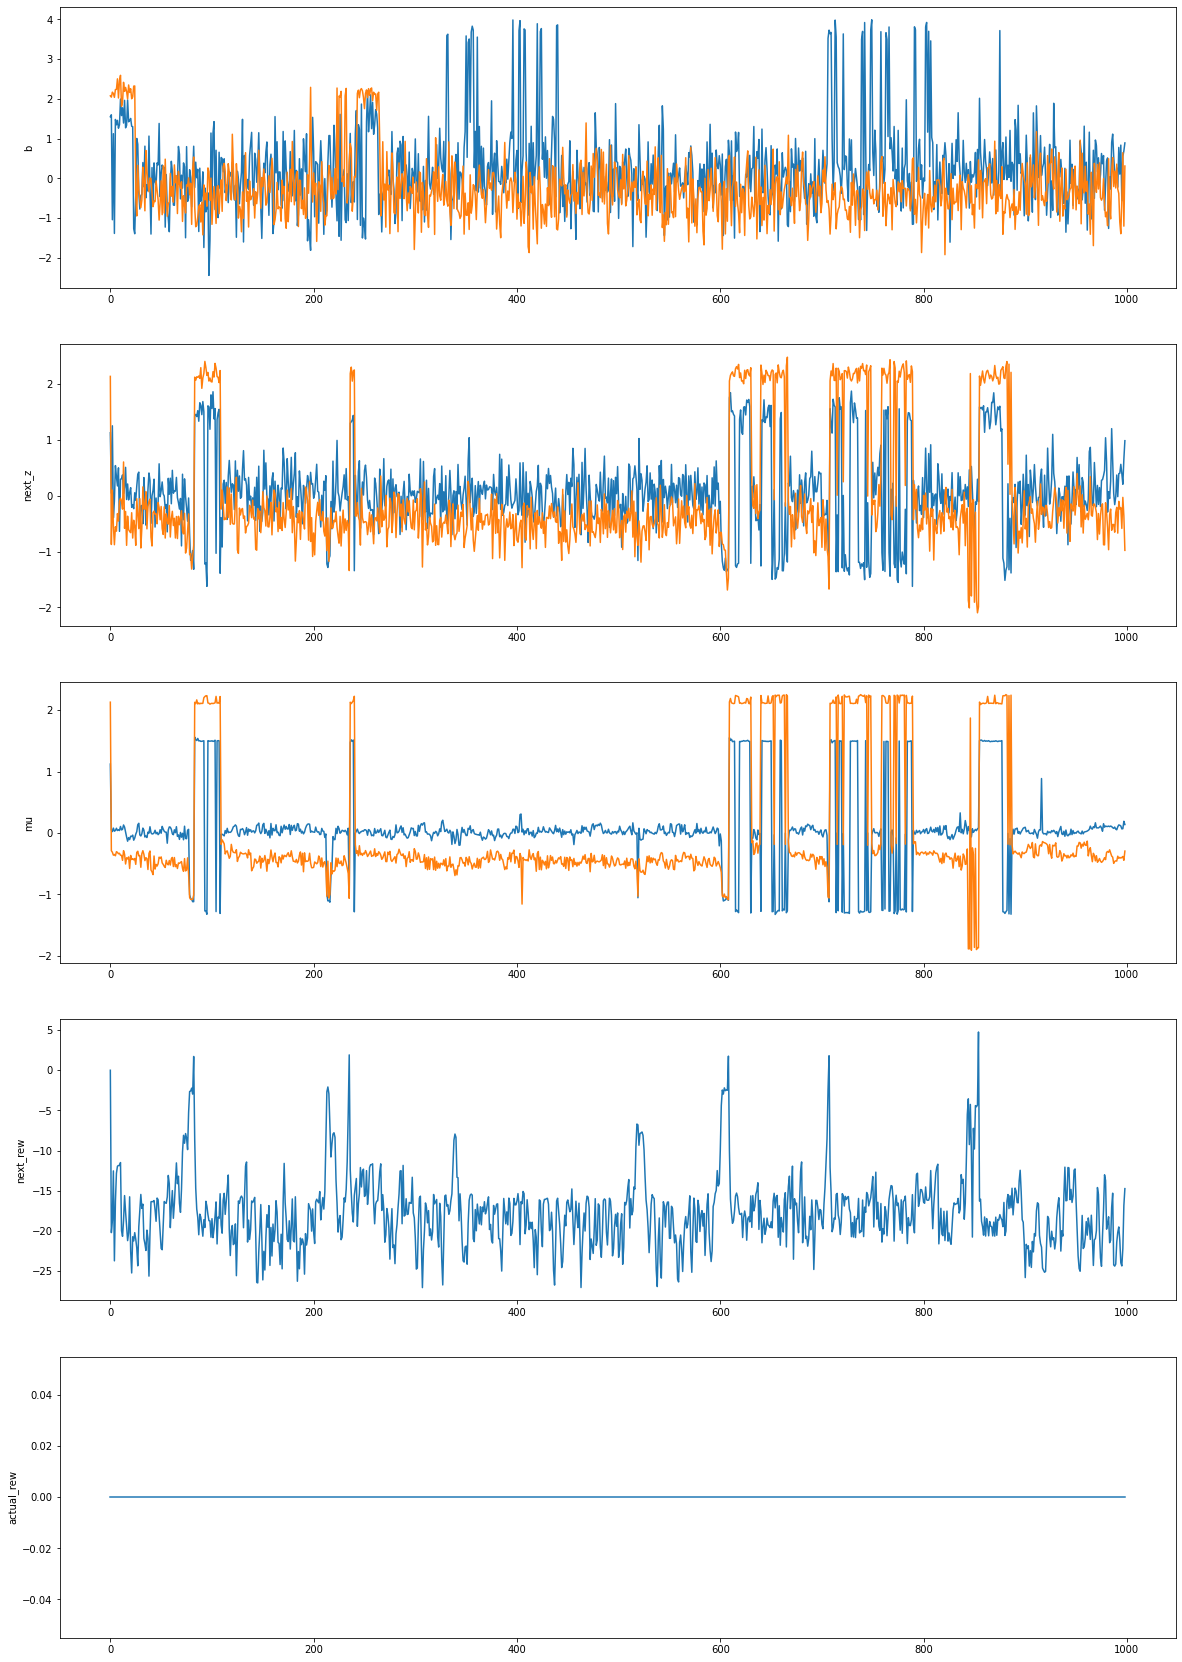

In [ ]:
plt.figure(figsize=(20,30))
for i in hot_zs:
    plt.subplot(511)
    plt.ylabel('b')
    plt.plot( b[i,:])#muが０に近づいていない次元の０～２９９ステップのｚの様子
    plt.subplot(512)
    plt.ylabel('next_z')
    plt.plot( next_zs[i,:])#muが０に近づいていない次元の０～２９９ステップzの様子
    
    plt.subplot(513)
    plt.ylabel('mu')
    plt.plot( next_mus[i,:])#muが０に近づいていない次元の０～２９９ステップmuの様子
    
plt.subplot(514)
plt.ylabel('next_rew')
plt.plot(next_rews[0,:])

plt.subplot(515)
plt.ylabel('actual_rew')
plt.plot(actual_rew[:])
b = np.swapaxes(actual,0,1)#(33,299)
print(b.shape)
actual_rew = b[-1,:]#(1,299)
actual_rew.shape

    